In [160]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [255]:
data = pd.read_csv('./data/covid_19_data.csv')

In [256]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [346]:
def combine_state(country):
    """
    Combining the confirmed number of different states in a country into total number
    """
    data_by_country = data[data['Country/Region'] == country]
    data_by_country = pd.DataFrame(data_by_country.groupby(['ObservationDate']).sum())
    data_by_country['ObservationDate'] = data_by_country.index
    return data_by_country

def extract_country(country_name):
    country = data[data['Country/Region'] == country_name]
    country = country.reset_index()
    return country

def calculate_start_outbreak_date(country):
    rate = 0
    i = 0
    while rate < 10:
        today = country['ObservationDate'][i]
        tomorrow = today + timedelta(1)
        tomorrow = tomorrow.strftime('%Y/%m/%d')
        
        today_confirmed = country['Confirmed'][country['ObservationDate'] == today]
        tomorrow_confirmed = country['Confirmed'][country['ObservationDate'] == tomorrow]
        
        rate = int(tomorrow_confirmed) - int(today_confirmed)
        i += 1
    return country['ObservationDate'][i]

def fit_regression(X_length, y):
    X = [i for i in range(X_length)]
    v = np.ones((X_length, 1))
    X = np.c_[v,X]
    reg = LinearRegression().fit(X, y)
    return reg.score(X, y), reg.coef_[1]
    
# def calculate_rate(country, start_date, end_date):
#     """
#     Calculate the given country's increasing rate of COVID-19 confirmed number, before and after a given date
#     """
#     country = country[country['ObservationDate'] > start_date]
#     before = country[country['ObservationDate'] <= middle_date]
#     after = country[country['ObservationDate'] > middle_date]
    
#     score_before, rate_before = fit_regression(before.shape[0], before['Confirmed'])
#     score_after, rate_after = fit_regression(after.shape[0], after['Confirmed'])
    
#     print('Accuracy:', score_before, '%')
#     print('rate before ', middle_date, ':', rate_before)
    
#     print('Accuracy:', score_after, '%')
#     print('rate after ', middle_date, ':', rate_after)

def calculate_rate(country, start_date, end_date):
    """
    Calculate the given country's increasing rate of COVID-19 confirmed number, before and after a given date
    """
    country = country[country['ObservationDate'] > start_date]
    country = country[country['ObservationDate'] <= end_date]
    
    score, rate = fit_regression(country.shape[0], country['Confirmed'])
    
    print('Accuracy:', score, '%')
    print('rate:', rate)
    
def find_convert_date(country, start_date):
    convert_date = ''
    highest_score = 0
    idx = country.index[country['ObservationDate'] == start_date].tolist()[0]
    dates = country['ObservationDate']
    
    for i in range(idx, country.shape[0]):
        score, rate = calculate_rate(country, outbreak_date, dates[i])
        if (score > highest_score):
            convert_date = dates[i]
            highest_score = score

In [350]:
calculate_rate(Germany, outbreak_date, '2020/04/10')
calculate_rate(Germany, '2020/04/11', '2020/05/04')

Accuracy: 0.8667028032682448 %
rate: 2990.177801268499
Accuracy: 0.9706559069375789 %
rate: 1780.975296442688


In [279]:
US = combine_state('US')
France = combine_state('France')
Japan = extract_country('Japan')
Italy = extract_country('Italy')
Korea = extract_country('South Korea')
Taiwan = extract_country('Taiwan')
Germany = extract_country('Germany')
UK = extract_country('UK')
Poland = extract_country('Poland')

In [322]:
def calculate_become_flatten_date(country, outbreak_date):
    rate_old = 0
    rate_new = 0
    first_two = True
    i = 0
    idx = country.index[country['ObservationDate'] == outbreak_date].tolist()[0]
#     while rate_old - rate_new > 50:
    while i < 1000:
        rate_new = rate_old
        
        today = country['ObservationDate'][i]
        tomorrow = today + timedelta(1)
        tomorrow = tomorrow.strftime('%Y/%m/%d')
        
        today_confirmed = country['Confirmed'][country['ObservationDate'] == today]
        tomorrow_confirmed = country['Confirmed'][country['ObservationDate'] == tomorrow]
        
        print(tomorrow, ':', tomorrow_confirmed)
        print(today, ':', today_confirmed)
        rate_old = int(tomorrow_confirmed) - int(today_confirmed)
        print('rate_new - rate_old:', rate_new - rate_old)
        i += 1
#     return country['ObservationDate'][i]

## Plot each country's rate

### US

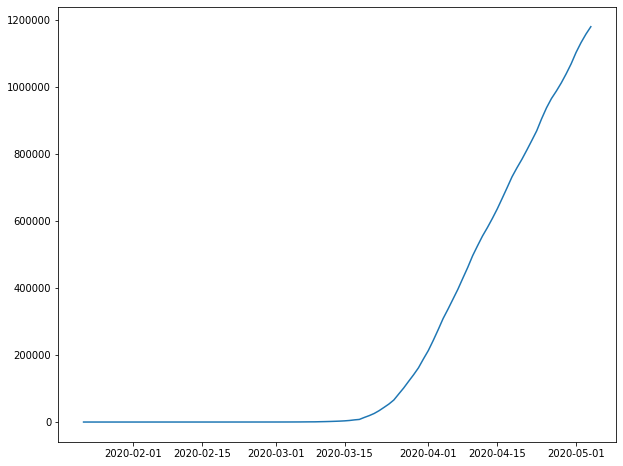

outbreak at: 2020-02-21 00:00:00


In [284]:
plt.figure(figsize=(10, 8))
plt.plot(US.index, US['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(US)
print('outbreak at:', outbreak_date)

### Italy

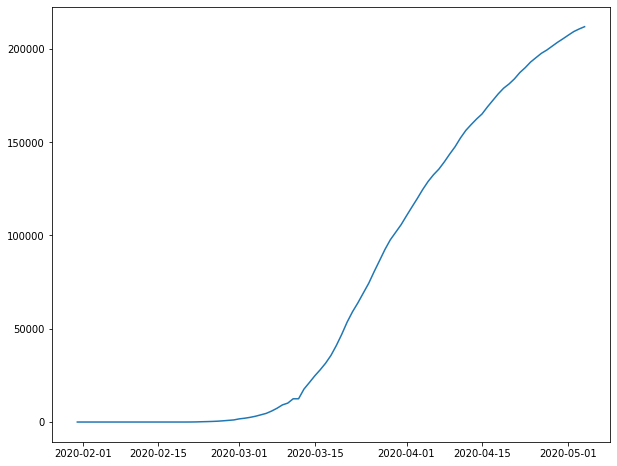

outbreak at: 2020-02-21 00:00:00


In [286]:
plt.figure(figsize=(10, 8))
plt.plot(Italy['ObservationDate'], Italy['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Italy)
print('outbreak at:', outbreak_date)

### Korea

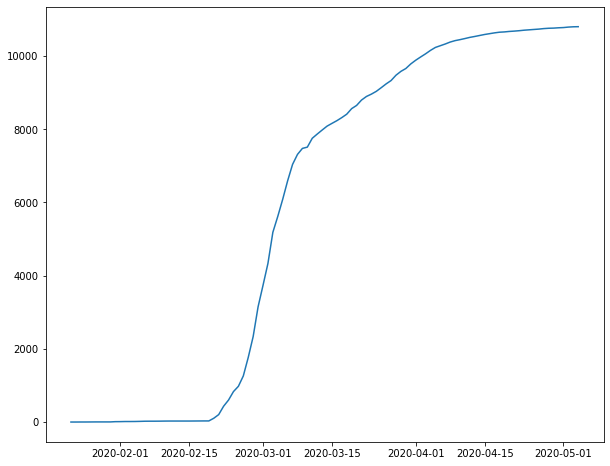

outbreak at: 2020-02-20 00:00:00


In [356]:
plt.figure(figsize=(10, 8))
plt.plot(Korea['ObservationDate'], Korea['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Korea)
print('outbreak at:', outbreak_date)

In [357]:
calculate_rate(Korea, outbreak_date, '2020/03/05')
calculate_rate(Korea, '2020/03/05', '2020/04/01')
calculate_rate(Korea, '2020/04/01', '2020/05/04')

Accuracy: 0.9557968962673828 %
rate: 482.11648351648347
Accuracy: 0.9817747131667831 %
rate: 110.2643467643468
Accuracy: 0.8649554186899557 %
rate: 21.647727272727277


### Taiwan

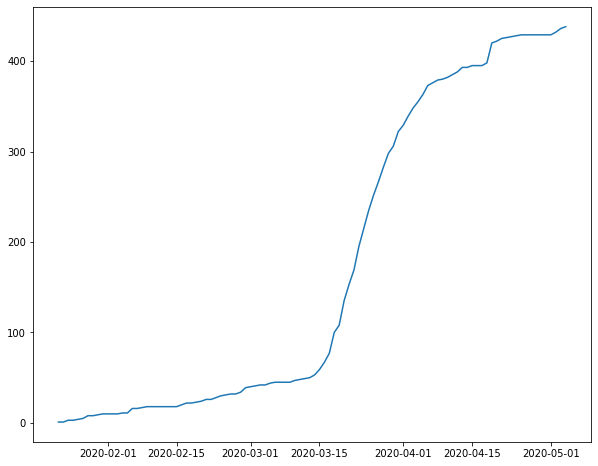

outbreak at: 2020-03-17 00:00:00


In [288]:
plt.figure(figsize=(10, 8))
plt.plot(Taiwan['ObservationDate'], Taiwan['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Taiwan)
print('outbreak at:', outbreak_date)

### Germany

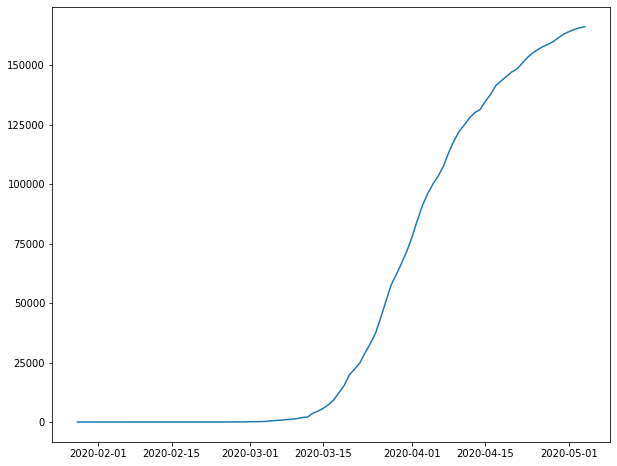

outbreak at: 2020-02-26 00:00:00


In [326]:
plt.figure(figsize=(10, 8))
plt.plot(Germany['ObservationDate'], Germany['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Germany)
print('outbreak at:', outbreak_date)

In [338]:
calculate_rate(Germany, outbreak_date, '2020/04/05')

Accuracy: 0.8240259151791334 %
rate: 2581.3404858299587


### France

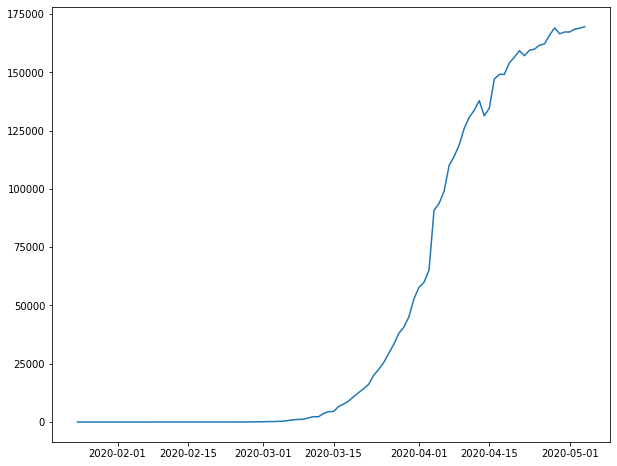

outbreak at: 2020-02-27 00:00:00


In [353]:
plt.figure(figsize=(10, 8))
plt.plot(France['ObservationDate'], France['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(France)
print('outbreak at:', outbreak_date)

In [354]:
calculate_rate(France, outbreak_date, '2020/04/10')
calculate_rate(France, '2020/04/11', '2020/05/04')

Accuracy: 0.7923694963231469 %
rate: 2756.8917245545144
Accuracy: 0.8793493727766759 %
rate: 1699.0108695652175
